## Option 1: Pyber

![Ride](../Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use Matplotlib for all plotting.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber_Example.pdf) for a reference on expected format.

In [698]:
# import relevant dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.style.use("seaborn")

In [699]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [700]:
# assign file paths to the datasets
filepath_city = os.path.join("raw_data","city_data.csv")
filepath_ride = os.path.join("raw_data","ride_data.csv")

In [701]:
# load the datasets to dataframes
df_city = pd.read_csv(filepath_city)
df_ride = pd.read_csv(filepath_ride)

In [702]:
# inspect the dataframe
display(df_city.head())
display(df_city.shape)
display(df_city.info())

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


(126, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
city            126 non-null object
driver_count    126 non-null int64
type            126 non-null object
dtypes: int64(1), object(2)
memory usage: 3.0+ KB


None

In [703]:
# inspect the dataframe
display(df_ride.head())
display(df_ride.shape)
display(df_ride.info())

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


(2375, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


None

## ======================================================================================================================

Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [704]:
# There is information on 125 unique cities in both the datasets
display(df_city['city'].nunique())
display(df_ride['city'].nunique())

125

125

In [705]:
# construct the three dataframes
df1 = df_city.groupby(['city','type']).agg({'driver_count':np.sum}).reset_index()
df2 = df_ride.groupby('city').agg({'fare':np.mean}).reset_index()
df3 = df_ride.groupby('city').agg({'ride_id':'count'}).reset_index()

# merge the three dataframe
df = pd.merge(df1,df2,how='outer',on='city')
df = pd.merge(df,df3,how='outer',on='city')

In [706]:
df.head()

,city,type,driver_count,fare,ride_id
0,Alvarezhaven,Urban,21,23.928710,31
1,Alyssaberg,Urban,67,20.609615,26
2,Anitamouth,Suburban,16,37.315556,9
3,Antoniomouth,Urban,21,23.625000,22
4,Aprilchester,Urban,49,21.981579,19


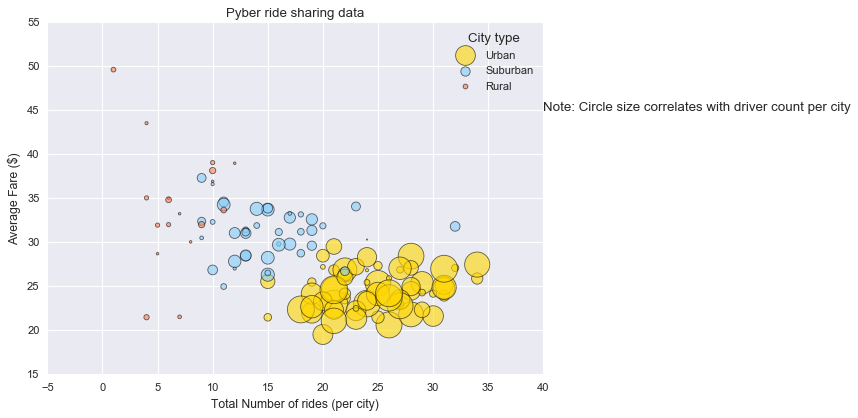

In [707]:
plt.scatter(
        x=df[df['type'] == 'Urban']['ride_id'],
        y=df[df['type'] == 'Urban']['fare'],
        c = '#FFD700',
        s = df[df['type'] == 'Urban']['driver_count']**1.5,
        alpha = 0.60,
        label = 'Urban',
        edgecolors="black",
        linewidths=0.75)

plt.scatter(
        x=df[df['type'] == 'Suburban']['ride_id'],
        y=df[df['type'] == 'Suburban']['fare'],
        c= '#87CEFA',
        s = df[df['type'] == 'Suburban']['driver_count']**1.5,
        alpha = 0.60,
        label = 'Suburban',
        edgecolors="black",
        linewidths=0.75)

plt.scatter(
        x=df[df['type'] == 'Rural']['ride_id'],
        y=df[df['type'] == 'Rural']['fare'],
        c= '#FF7F50',
        s = df[df['type'] == 'Rural']['driver_count']**1.5,
        alpha = 0.60,
        label = 'Rural',
        edgecolors="black",
        linewidths=0.75)

plt.legend( title="City type")
plt.xlabel("Total Number of rides (per city)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber ride sharing data")
plt.annotate("Note: Circle size correlates with driver count per city",xy=(40, 45),xytext=(40, 45))
plt.show()

## ======================================================================================================================
 You will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

In [708]:
# % of Total Fares by City Type
pie_fare = df.groupby('type').agg({'fare':np.sum}).reset_index().sort_values('type',ascending=False)
pie_fare

,type,fare
2,Urban,1623.863390
1,Suburban,1268.627391
0,Rural,615.728572


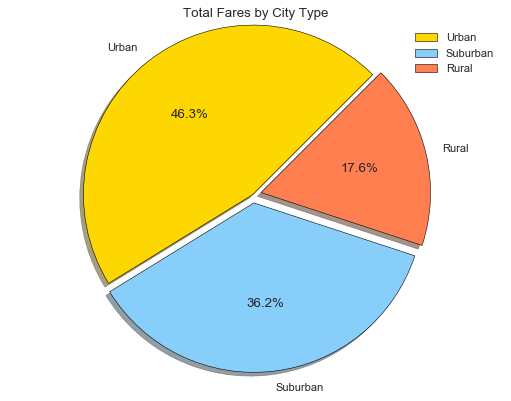

In [709]:
labels = pie_fare['type']
sizes = pie_fare['fare']
colors = ['#FFD700', '#87CEFA', '#FF7F50']
explode = (0, 0.05, 0.05) 
plt.pie(sizes, colors=colors,explode=explode, autopct='%1.1f%%',labels=labels,startangle=45,
       wedgeprops   = { 'linewidth' : 0.5,'edgecolor' : "black" },shadow=True,
       labeldistance=1.10)
plt.axis('equal')
plt.title("Total Fares by City Type")
plt.legend()
plt.show()

In [710]:
# % of Total Rides by City Type
pie_rides = df.groupby('type').agg({'ride_id':np.sum}).reset_index().sort_values('type',ascending=False)
pie_rides

,type,ride_id
2,Urban,1625
1,Suburban,625
0,Rural,125


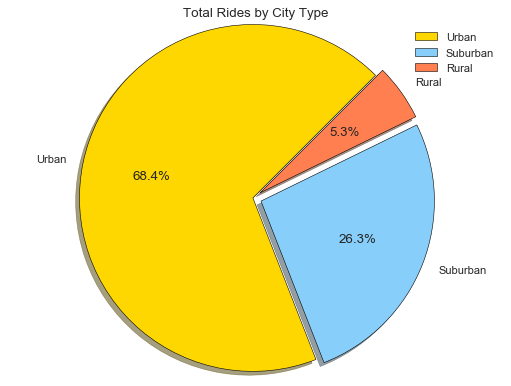

In [711]:
labels = pie_rides['type']
sizes = pie_rides['ride_id']
colors = ['#FFD700', '#87CEFA', '#FF7F50']
explode = (0, 0.05, 0.05) 
plt.pie(sizes, colors=colors,explode=explode, autopct='%1.1f%%',labels=labels,startangle=45,
       wedgeprops   = { 'linewidth' : 0.5,'edgecolor' : "black" },shadow=True,
       labeldistance=1.10)
plt.axis('equal')
plt.title("Total Rides by City Type")
plt.legend()
plt.show()

In [712]:
# % of Total Drivers by City Type
pie_drivers = df.groupby('type').agg({'driver_count':np.sum}).reset_index().sort_values('type',ascending=False)
pie_drivers

,type,driver_count
2,Urban,2607
1,Suburban,638
0,Rural,104


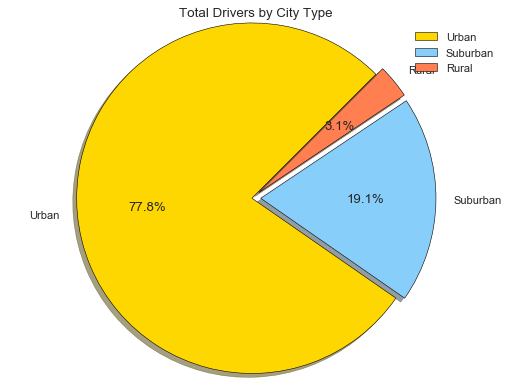

In [713]:
labels = pie_drivers['type']
sizes = pie_drivers['driver_count']
colors = ['#FFD700', '#87CEFA', '#FF7F50']
explode = (0, 0.05, 0.05) 
plt.pie(sizes, colors=colors,explode=explode, autopct='%1.1f%%',labels=labels,startangle=45,
       wedgeprops   = { 'linewidth' : 0.5,'edgecolor' : "black" },shadow=True,
       labeldistance=1.10)
plt.axis('equal')
plt.title("Total Drivers by City Type")
plt.legend()
plt.show()